# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

In [1]:
import pandas as pd

## 1. Download the dataset

## 2. Load the dataset 

In [3]:
# had to add names as it was taking the first data entry as column names before
data = pd.read_csv("financial_news_headlines_sentiment.csv", 
                   encoding ='latin1', names=['label','text'])

## 3. Explore the dataset 

In [4]:
data

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [5]:
data.shape

(4846, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4846 non-null   object
 1   text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [7]:
data.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [8]:
data.columns

Index(['label', 'text'], dtype='object')

In [9]:
print(data.isna().sum())

label    0
text     0
dtype: int64


In [10]:
data.label.value_counts()

neutral     2879
positive    1363
negative     604
Name: label, dtype: int64

## 4. Clean the data 

In [11]:
import re
for i in data.index:
    data.values[i][1] = data.values[i][1].lower()
    data.values[i][1] = re.sub(r'\W',' ',data.values[i][1])
    data.values[i][1] = re.sub(r'\s+',' ',data.values[i][1])

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(data.label)

array([1, 1, 0, ..., 0, 0, 0])

In [13]:
y = encoder.transform(data.label)

## 5. SMOTE (Imbalanced dataset)
Hint: Use **imblearn** library

In [14]:
data.head()

,label,text
0,neutral,according to gran the company has no plans to ...
1,neutral,technopolis plans to develop in stages an area...
2,negative,the international electronic industry company ...
3,positive,with the new production plant the company woul...
4,positive,according to the company s updated strategy fo...


## 6. BoW model 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [17]:
vectorizer.fit(data.text)
bow_x = vectorizer.fit_transform(data.text)

In [18]:
bow_x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
bow_x.shape

(4846, 10070)

## 7. Tf-idf model

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer()

In [22]:
tfidf_x = tfidf.fit_transform(data.text)

In [23]:
tfidf_x.toarray()

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.147059, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

## 8. Split train test data 

In [24]:
from sklearn.model_selection import train_test_split
bowx_train, bowx_test, bowy_train, bowy_test = train_test_split(bow_x,y,test_size=0.2)

In [25]:
bowx_train.shape, bowy_train.shape, bowx_test.shape,  bowy_test.shape

((3876, 10070), (3876,), (970, 10070), (970,))

In [26]:
tfx_train, tfx_test, tfy_train, tfy_test = train_test_split(tfidf_x,y,test_size=0.2)

## 9. Classification Algorithm 
- Train
- Predict

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
MNB = MultinomialNB()
MNB.fit(bowx_train,bowy_train)

MultinomialNB()

In [29]:
MNBpreds = MNB.predict(bowx_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(bowy_test, MNBpreds)
accuracy

0.6927835051546392

## 10. Another Classification Algorithm 
- Train
- Predict

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [32]:
lr = LogisticRegression()
lr.fit(tfx_train,tfy_train)

LogisticRegression()

In [33]:
lrpreds = lr.predict(tfx_test)
accuracy = accuracy_score(tfy_test, lrpreds)
accuracy

0.7649484536082474

## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods 

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

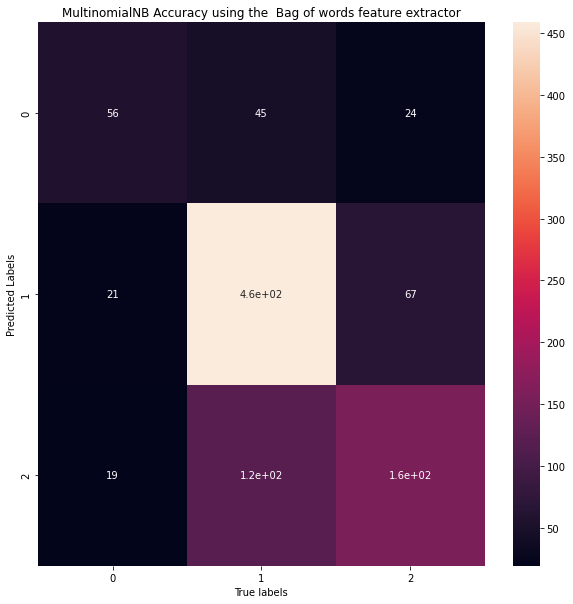

In [35]:
plt.figure(figsize=(10,10))
MNDmat = confusion_matrix(bowy_test,MNBpreds)
sns.heatmap(MNDmat,annot=True)
plt.xlabel("True labels")
plt.ylabel("Predicted Labels")
plt.title("MultinomialNB Accuracy using the  Bag of words feature extractor")
plt.show()

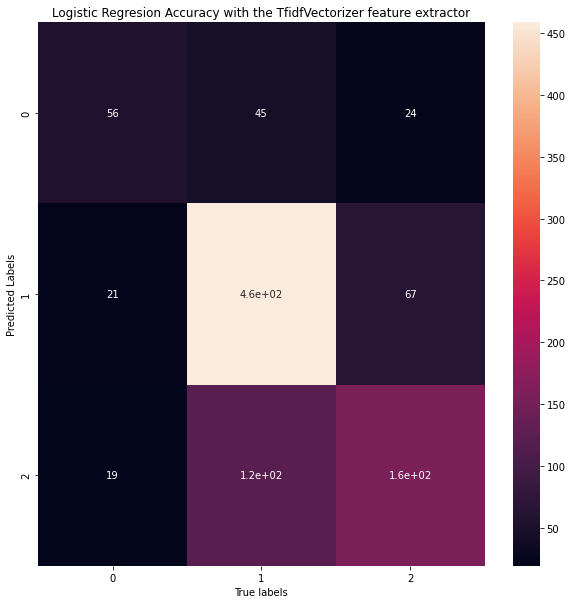

In [36]:
plt.figure(figsize=(10,10))
lrmat = confusion_matrix(tfy_test, lrpreds)
sns.heatmap(MNDmat,annot=True)
plt.xlabel("True labels")
plt.ylabel("Predicted Labels")
plt.title("Logistic Regresion Accuracy with the TfidfVectorizer feature extractor")
plt.show()